# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[67,  3, 68, ..., 71, 19, 34],
       [30, 96, 20, ...,  4, 96, 28],
       [14, 81, 38, ..., 82, 44, 85],
       ...,
       [87, 15, 20, ..., 85, 42, 73],
       [55, 21, 20, ..., 67, 40, 13],
       [ 5, 14, 74, ..., 51, 97, 42]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [10]:
import numpy as np
# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))
print('A =', A)
# Генерируем случайную перестановку столбцов
permutation = np.random.permutation(A.shape[1])
# Применяем перестановку к столбцам массива A
A_permuted = A[:, permutation]
# A_permuted содержит столбцы A в случайном порядке
print('A_permuted =', A_permuted)


A = [[ 7 47 31 ... 59 83 29]
 [72 23  5 ... 17 93  7]
 [18 81 40 ... 78 97  1]
 ...
 [92 35 42 ... 62  3 44]
 [80 51 75 ... 92 19 70]
 [24 47 31 ... 57 92  9]]
A_permuted = [[68 56 31 ... 52 93 98]
 [ 1 36  5 ... 86  1 21]
 [93 11 40 ... 14 81 77]
 ...
 [32  2 42 ... 36  9 12]
 [25 48 75 ... 52 71 71]
 [ 0 45 31 ... 20  1 50]]


# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [12]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Вычисляем суммы по четным и нечетным столбцам
even_column_sum = np.sum(A[:, ::2], axis=1)
odd_column_sum = np.sum(A[:, 1::2], axis=1)

# Вычисляем среднее значение суммы по нечетным столбцам
mean_odd_column_sum = np.mean(odd_column_sum)

# Выбираем строки, удовлетворяющие условию
selected_rows = A[even_column_sum > mean_odd_column_sum]

# Выводим результат
print("Массив A:")
print(A)
print("\nВыбранные строки:")
print(selected_rows)


Массив A:
[[80 61 55 ... 85 74 51]
 [35 30 38 ... 58 56 17]
 [ 2 45 25 ...  1 19  4]
 ...
 [39 11 57 ... 59 42 55]
 [81 85 84 ... 14  2 91]
 [22 63 83 ... 64 96 43]]

Выбранные строки:
[[35 30 38 ... 58 56 17]
 [78 37 65 ... 67 24 90]
 [63 65 83 ... 43 83 79]
 ...
 [42 98 28 ... 22 62 25]
 [ 3 35 47 ... 75 77 26]
 [22 63 83 ... 64 96 43]]


# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [14]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Находим разницу между максимальным и минимальным элементом в каждой строке
row_max = np.max(A, axis=1)
row_min = np.min(A, axis=1)
row_diff = row_max - row_min

# Находим индекс строки с максимальной разницей
index_of_max_difference = np.argmax(row_diff)

# Выводим индекс строки
print(A)
print("Индекс строки с максимальной разницей между максимальным и минимальным элементами:", index_of_max_difference)


[[35 55 98 ...  0 92  3]
 [66 90 71 ... 45 30 45]
 [98 40 56 ... 45 34 99]
 ...
 [70 87 87 ... 58  2 75]
 [68 58 94 ... 69 26 58]
 [42 68 76 ... 78 46 96]]
Индекс строки с максимальной разницей между максимальным и минимальным элементами: 3


# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [15]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Получаем индексы отсортированных элементов для каждой строки
sorted_indices = np.argsort(A, axis=1)

# Создаем массив с порядковыми номерами элементов
sorted_ranked_array = np.empty_like(A)
for i in range(A.shape[0]):
    sorted_ranked_array[i] = sorted_indices[i].argsort() + 1

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nМассив с порядковыми номерами:")
print(sorted_ranked_array)


Массив A:
[[ 9 19 66 ... 99 58 85]
 [59 29 43 ... 13  1  6]
 [61 72 35 ... 67 15 23]
 ...
 [60 87 72 ... 49 49 30]
 [93 83  8 ... 31 84 76]
 [11 62 11 ... 27 73 63]]

Массив с порядковыми номерами:
[[ 4 14 35 ... 50 32 46]
 [30 18 26 ...  8  1  3]
 [33 39 16 ... 35  8 10]
 ...
 [30 44 38 ... 22 23 13]
 [46 40  4 ... 21 41 37]
 [ 7 28  8 ... 13 36 30]]


# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [16]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Находим минимальное и максимальное значение в каждой строке
min_values = np.min(A, axis=1, keepdims=True)
max_values = np.max(A, axis=1, keepdims=True)

# Применяем мин-макс нормализацию
normalized_A = (A - min_values) / (max_values - min_values)

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nМин-макс нормализованный массив:")
print(normalized_A)


Массив A:
[[49 50 20 ...  7 93 49]
 [41 75 63 ... 47 88 89]
 [86 63 92 ... 90 59 65]
 ...
 [97  6 36 ... 26  9  4]
 [66 92 94 ... 94 33  1]
 [16 83 67 ... 34  6 98]]

Мин-макс нормализованный массив:
[[0.5        0.51020408 0.20408163 ... 0.07142857 0.94897959 0.5       ]
 [0.41052632 0.76842105 0.64210526 ... 0.47368421 0.90526316 0.91578947]
 [0.88297872 0.63829787 0.94680851 ... 0.92553191 0.59574468 0.65957447]
 ...
 [0.98979592 0.06122449 0.36734694 ... 0.26530612 0.09183673 0.04081633]
 [0.69473684 0.96842105 0.98947368 ... 0.98947368 0.34736842 0.01052632]
 [0.10869565 0.83695652 0.66304348 ... 0.30434783 0.         1.        ]]


# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [17]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Создаем трехмерный массив размерности 10x200x50
n = 10
expanded_A = np.zeros((n, *A.shape))

# Заполняем подмассивы умноженными значениями от 1 до 10
for i in range(n):
    expanded_A[i] = A * (i + 1)

# Выводим полученный трехмерный массив
print("Трехмерный массив:")
print(expanded_A)


Трехмерный массив:
[[[ 13.  21.  16. ...  57.  14.  63.]
  [ 51.   0.  42. ...  24.  45.  74.]
  [ 86.   7.  15. ...  21.  29.  60.]
  ...
  [ 20.  67.  84. ...  81.  35.  47.]
  [ 33.  92.  85. ...  92.  41.  71.]
  [ 14.  25.  94. ...  71.  70.  71.]]

 [[ 26.  42.  32. ... 114.  28. 126.]
  [102.   0.  84. ...  48.  90. 148.]
  [172.  14.  30. ...  42.  58. 120.]
  ...
  [ 40. 134. 168. ... 162.  70.  94.]
  [ 66. 184. 170. ... 184.  82. 142.]
  [ 28.  50. 188. ... 142. 140. 142.]]

 [[ 39.  63.  48. ... 171.  42. 189.]
  [153.   0. 126. ...  72. 135. 222.]
  [258.  21.  45. ...  63.  87. 180.]
  ...
  [ 60. 201. 252. ... 243. 105. 141.]
  [ 99. 276. 255. ... 276. 123. 213.]
  [ 42.  75. 282. ... 213. 210. 213.]]

 ...

 [[104. 168. 128. ... 456. 112. 504.]
  [408.   0. 336. ... 192. 360. 592.]
  [688.  56. 120. ... 168. 232. 480.]
  ...
  [160. 536. 672. ... 648. 280. 376.]
  [264. 736. 680. ... 736. 328. 568.]
  [112. 200. 752. ... 568. 560. 568.]]

 [[117. 189. 144. ... 513. 126.

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [18]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Разделяем четные и нечетные столбцы
even_columns = A[:, ::2]
odd_columns = A[:, 1::2]

# Объединяем их в новом массиве
result_array = np.concatenate((even_columns, odd_columns), axis=1)

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nНовый массив с четными и нечетными столбцами:")
print(result_array)


Массив A:
[[37 25 67 ... 64 85 53]
 [13 54 23 ... 91 60 91]
 [70 17 62 ... 78 66 44]
 ...
 [73 16 62 ... 16 95 29]
 [27 74 61 ... 33 30 36]
 [ 7 18 19 ...  1 83 57]]

Новый массив с четными и нечетными столбцами:
[[37 67 64 ...  4 64 53]
 [13 23 70 ... 45 91 91]
 [70 62 71 ...  0 78 44]
 ...
 [73 62 25 ... 74 16 29]
 [27 61 61 ... 57 33 36]
 [ 7 19 54 ... 77  1 57]]


# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [19]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 10, size=(200, 50))

# Подсчитываем количество строк, в которых все элементы больше 5
count = np.sum(np.all(A > 5, axis=1))

# Выводим количество подходящих строк
print("Количество строк, в которых все элементы больше 5:", count)


Количество строк, в которых все элементы больше 5: 0


# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [20]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Разделяем массив A на 10 частей
split_parts = np.split(A, 10, axis=0)

# Вычисляем среднее значение для каждой части
mean_parts = [np.mean(part, axis=0) for part in split_parts]

# Соединяем средние части обратно в один массив
result_array = np.vstack(mean_parts)

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nНовый массив средних значений:")
print(result_array)


Массив A:
[[58 40 50 ... 68 38  8]
 [ 1 47 74 ... 19 58 66]
 [35 62  3 ... 42 37 36]
 ...
 [69 66 61 ... 33 65 13]
 [12 38 81 ... 88 62 16]
 [37 61 48 ... 11 77 30]]

Новый массив средних значений:
[[52.   40.25 52.25 46.9  45.3  44.35 48.8  47.35 46.8  42.7  47.65 64.55
  53.   51.95 56.15 61.4  57.45 47.85 41.9  44.2  57.55 59.1  43.   44.15
  40.5  56.6  60.35 51.65 59.85 51.85 51.75 55.4  49.6  42.9  51.25 52.45
  54.15 47.4  49.2  41.4  49.9  47.8  54.5  51.9  42.8  53.35 49.35 49.9
  48.75 35.1 ]
 [43.45 56.65 48.6  54.75 47.55 57.5  46.7  46.7  60.4  51.45 43.1  38.25
  51.2  55.3  57.2  49.95 61.65 45.5  47.5  39.85 54.1  49.2  41.   65.45
  40.95 49.9  47.2  54.   37.4  59.6  36.75 59.25 50.65 53.05 42.75 58.1
  56.4  47.75 52.   47.95 35.15 55.   57.95 64.4  59.8  51.55 55.4  54.2
  51.5  55.9 ]
 [55.95 45.05 39.85 44.4  38.45 54.05 58.15 46.75 57.5  50.85 38.6  50.35
  38.1  55.65 50.05 51.3  45.4  47.6  51.15 46.15 50.6  41.85 50.85 52.85
  60.7  54.6  53.05 47.55 40.85 40.

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [21]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 10, size=(200, 50))

# Разворачиваем массив A в одномерный массив
flattened_A = A.flatten()

# Используем np.unique с параметром return_index=True
unique_elements, unique_indices = np.unique(flattened_A, return_index=True)

# Получаем уникальные элементы в том же порядке, в котором они встречаются в массиве
unique_elements_in_original_order = flattened_A[np.sort(unique_indices)]

# Выводим полученный одномерный массив с уникальными элементами
print("Уникальные элементы в том же порядке, в котором они встречаются в массиве A:")
print(unique_elements_in_original_order)


Уникальные элементы в том же порядке, в котором они встречаются в массиве A:
[7 0 6 4 2 5 8 9 3 1]


# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [22]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Вычисляем среднюю строку A
mean_row = np.mean(A, axis=0)

# Инициализируем массив для хранения евклидовых расстояний
euclidean_distances = np.zeros(A.shape[0])

# Вычисляем евклидово расстояние для каждой строки и средней строки
for i in range(A.shape[0]):
    euclidean_distances[i] = np.linalg.norm(A[i] - mean_row)

# Выводим полученный одномерный массив
print("Одномерный массив с евклидовыми расстояниями:")
print(euclidean_distances)


Одномерный массив с евклидовыми расстояниями:
[201.13437169 182.49297377 203.6358158  197.11746618 179.72435972
 202.26642202 214.47462665 188.71774022 216.17686156 203.82027739
 196.94561553 219.8444802  189.65952514 187.4646246  202.62207549
 208.71256664 214.32369322 227.16008777 198.71974103 198.81638633
 194.98734696 217.84410819 206.10450135 207.3174992  226.17868042
 228.32191195 201.40065907 176.97080402 221.06534209 198.40288676
 188.50388716 192.02561151 195.22378307 197.05274795 198.67062056
 201.93762768 223.38349419 199.30159426 212.08869719 198.64368974
 214.91874156 193.53437802 179.87939147 181.86342534 191.85227514
 210.49172306 201.93948469 202.17703993 204.38533576 214.39688775
 216.71860897 195.6466342  189.54715897 192.10358007 217.3613247
 205.96602991 204.74988516 194.66945183 200.52485002 197.74133477
 202.25398754 184.65033299 198.71881007 215.98130816 187.26995348
 194.24236272 223.82375985 210.40295976 185.45189531 205.60443934
 215.57974273 215.42245815 188.

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [23]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Создаем новый массив, применяя указанные правила
new_array = np.where(A < 50, A * 2, A * 3)

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nНовый массив с примененными правилами:")
print(new_array)


Массив A:
[[12 71 79 ... 12 28 73]
 [89 52 70 ... 28 45 93]
 [30 52 74 ... 88 20  3]
 ...
 [41 59 19 ...  2 36 40]
 [26 74 80 ...  2 76  7]
 [11 81 73 ... 81 45 77]]

Новый массив с примененными правилами:
[[ 24 213 237 ...  24  56 219]
 [267 156 210 ...  56  90 279]
 [ 60 156 222 ... 264  40   6]
 ...
 [ 82 177  38 ...   4  72  80]
 [ 52 222 240 ...   4 228  14]
 [ 22 243 219 ... 243  90 231]]


# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [25]:
import numpy as np

# Создаем массив A
A = np.random.randint(0, 100, size=(200, 50))

# Развернем массив A в одномерный массив
flattened_A = A.flatten()

# Функция для расчета скользящего среднего
def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='valid')

# Вычисляем скользящие средние с окнами 3, 5 и 10
window_sizes = [3, 5, 10]
moving_averages = [moving_average(flattened_A, window_size) for window_size in window_sizes]

# Находим максимальную длину скользящих средних
max_length = max(len(average) for average in moving_averages)

# Выравниваем их по максимальной длине, добавляя нули справа
aligned_moving_averages = [np.pad(average, (0, max_length - len(average)), 'constant', constant_values=(0, 0)) for average in moving_averages]

# Находим сумму выровненных скользящих средних
sum_of_moving_averages = np.sum(aligned_moving_averages, axis=0)

# Выводим результат
print("Скользящие средние:")
for i, window_size in enumerate(window_sizes):
    print(f"Скользящее среднее с окном {window_size}:", moving_averages[i])
print("\nСумма скользящих средних:")
print(sum_of_moving_averages)



Скользящие средние:
Скользящее среднее с окном 3: [45.         59.33333333 54.33333333 ... 52.         68.33333333
 75.        ]
Скользящее среднее с окном 5: [57.6 59.2 48.4 ... 54.4 63.6 63.6]
Скользящее среднее с окном 10: [42.1 41.1 37.4 ... 50.9 56.2 62.7]

Сумма скользящих средних:
[144.7        159.63333333 140.13333333 ... 115.6         68.33333333
  75.        ]


# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

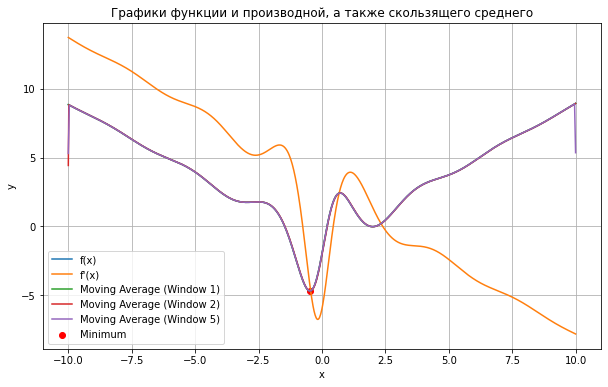

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Определяем функцию f(x)
def f(x):
    return (5 * np.sin(2 * x) - np.cos(2 * x) - 1 + np.abs(x**3) - x**2) / (x**2 + 1)

# Определяем производную функции f(x)
def f_prime(x):
    return ((-5 * np.cos(2 * x) - 2 * np.cos(2 * x) + 3 * x**2 - x**3 + 1) * (x**2 + 1) + 
            (5 * np.sin(2 * x) - x * np.abs(x**3) + x * (x**2 - 1))) / (x**2 + 1)**2

# Создаем массив x для значений x
x = np.linspace(-10, 10, 1000)

# Вычисляем значения функции f(x) и ее производной
y = f(x)
y_prime = f_prime(x)

# Находим минимум функции f(x) с помощью scipy
min_result = minimize(f, x0=0)

# Создаем скользящие средние с окнами 1, 2, 5
moving_average_1 = np.convolve(y, np.ones(1)/1, mode='same')
moving_average_2 = np.convolve(y, np.ones(2)/2, mode='same')
moving_average_5 = np.convolve(y, np.ones(5)/5, mode='same')

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.plot(x, y_prime, label="f'(x)")
plt.plot(x, moving_average_1, label='Moving Average (Window 1)')
plt.plot(x, moving_average_2, label='Moving Average (Window 2)')
plt.plot(x, moving_average_5, label='Moving Average (Window 5)')
plt.scatter(min_result.x, min_result.fun, color='red', marker='o', label='Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Графики функции и производной, а также скользящего среднего')
plt.grid(True)
plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [2]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 4, 4, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [42]:
import numpy as np
from typing import List

def sample_optimized(x: List[int], c: int) -> List[int]:
    assert len(x) > 0

    cum_sum_x = np.cumsum(x)
    rand_vals = np.random.random(c) * cum_sum_x[-1]

    # Find the first index where rand_vals is less than the cumulative sum
    res = np.argmax(rand_vals[:, np.newaxis] < cum_sum_x, axis=1)

    return res.tolist()

# Проверим корректность оптимизированного алгоритма

x = [50, 3, 1, 7, 20]
c = 10000

# Генерируем семплы с помощью оригинального алгоритма
original_samples = sample(x, c)

# Генерируем семплы с помощью оптимизированного алгоритма
optimized_samples = sample_optimized(x, c)

# Создаем гистограммы для обоих наборов семплов
hist_original, _ = np.histogram(original_samples, bins=len(x))
hist_optimized, _ = np.histogram(optimized_samples, bins=len(x))

# Сравниваем гистограммы семплов
chi2_stat, p_value = chisquare(f_obs=hist_optimized, f_exp=hist_original)

if p_value < 0.05:
    print(f"Статистические тесты не прошли. p-value = {p_value}")
else:
    print(f"Статистические тесты успешно пройдены. p-value = {p_value}")


Статистические тесты успешно пройдены. p-value = 0.43335733479962624


# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [3]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2003

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

Время выполнения оригинального алгоритма: 5.2424 секунд
Время выполнения оптимизированного алгоритма: 0.1873 секунд


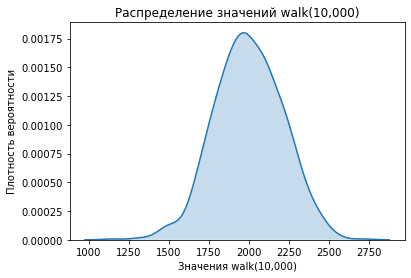

In [46]:
import numpy as np
import random
import timeit
import seaborn as sns
import matplotlib.pyplot as plt

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])
    return cur_position

def walk_optimized(n: int):
    steps = np.random.choice([-3, -1, 0, 2, 3], n)
    positions = np.cumsum(steps)
    return positions[-1]

# Сравним производительность обоих версий с помощью timeit
n = 10_000
num_samples = 1000

def time_original_walk():
    return [walk(n) for _ in range(num_samples)]

def time_optimized_walk():
    return [walk_optimized(n) for _ in range(num_samples)]

original_time = timeit.timeit(time_original_walk, number=1)
optimized_time = timeit.timeit(time_optimized_walk, number=1)

print(f"Время выполнения оригинального алгоритма: {original_time:.4f} секунд")
print(f"Время выполнения оптимизированного алгоритма: {optimized_time:.4f} секунд")

# Генерируем выборку и строим график распределения
samples = [walk_optimized(n) for _ in range(num_samples)]

sns.kdeplot(samples, shade=True)
plt.xlabel("Значения walk(10,000)")
plt.ylabel("Плотность вероятности")
plt.title("Распределение значений walk(10,000)")

plt.show()



# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [4]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


-0.13580565475012618

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [14]:
!pip install cython


In [19]:
import numpy as np
from numba import jit
import time

# Функция до оптимизации
def strange_conv_original(a):
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

a = np.random.random((10000, 10000))

# Замер времени выполнения функции до оптимизации
start_time = time.time()
result_original = strange_conv_original(a)
end_time = time.time()
original_execution_time = end_time - start_time
print("Время выполнения функции до оптимизации:", original_execution_time, "секунд")

# Оптимизированная функция с Numba
@jit
def strange_conv_optimized(a):
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

# Замер времени выполнения оптимизированной функции с Numba
start_time = time.time()
result_optimized = strange_conv_optimized(a)
end_time = time.time()
optimized_execution_time = end_time - start_time
print("Время выполнения оптимизированной функции с Numba:", optimized_execution_time, "секунд")

# Проверка на корректность результата
assert result_original == result_optimized



Время выполнения функции до оптимизации: 23.13329029083252 секунд
Время выполнения оптимизированной функции с Numba: 0.18806004524230957 секунд
